In [1]:
import pandas as pd
data = pd.read_excel('d.xlsx')
data.head()

,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000


In [2]:
clients = pd.read_excel('d.xlsx', 'Clients')
clients.head()

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015


In [3]:
region = pd.read_excel('d.xlsx', 'Region_dict')
region.head()

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


In [4]:
import matplotlib.pyplot as plt

In [126]:
df_region = region.groupby('city').count()['id_trading_point'].reset_index().sort_values(by = 'id_trading_point', ascending = False)

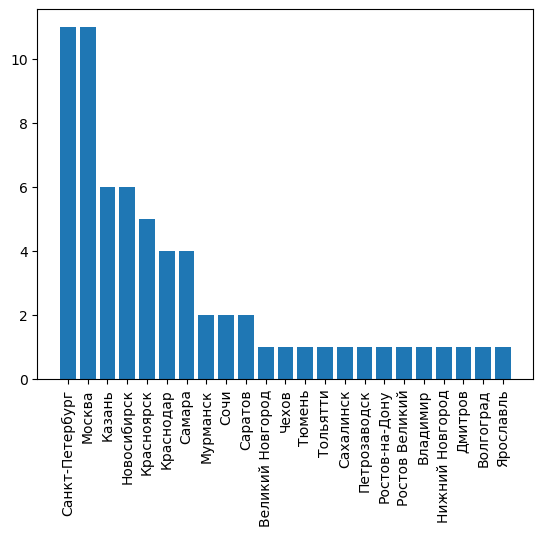

In [127]:
plt.bar(df_region['city'], df_region['id_trading_point'])
plt.xticks(rotation = 90)
plt.show()

In [32]:
data = data.dropna()
clients = clients.dropna()
region = region.dropna()

In [34]:
data_clients = data.merge(clients, on = 'id_client', how = 'outer')
data_clients_region = data_clients.merge(region, on = 'id_trading_point')

In [36]:
data_clients_region_svod = data_clients_region.groupby(['id_client', 'id_trading_point', 'city']).agg({'id_order' : 'count', 'amt_payment': sum}).reset_index()
data_clients_region_svod

,id_client,id_trading_point,city,id_order,amt_payment
0,178561.0,453.0,Санкт-Петербург,1,3052.0
1,178562.0,2652.0,Москва,1,2439.0
2,178563.0,112.0,Санкт-Петербург,1,768.0
3,178564.0,26.0,Ростов-на-Дону,0,0.0
4,178565.0,739.0,Новосибирск,1,958.0
...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0
55352,331950.0,1654.0,Москва,0,0.0
55353,331954.0,544.0,Казань,0,0.0
55354,331955.0,72.0,Сочи,0,0.0


In [39]:
data_clients_region_svod['amt_payment'] = data_clients_region_svod['amt_payment'].fillna(0)

In [40]:
new_df = data_clients_region_svod.merge(clients[['id_client', 'dtime_ad', 'nflag_test']], on = 'id_client')

In [42]:
import numpy as np

In [47]:
new_df['flag_pay'] = np.where(new_df['amt_payment'] > 0, 1, 0)
new_df.groupby('city').nunique()['id_trading_point'].reset_index()

,city,id_trading_point
0,Великий Новгород,1
1,Владимир,1
2,Волгоград,1
3,Дмитров,1
4,Казань,6
5,Краснодар,4
6,Красноярск,5
7,Москва,11
8,Мурманск,2
9,Нижний Новгород,1


In [62]:
def test_calc(r1, r2, alpha = 0.05):
    s, p = ttest_ind(r1, r2)
    if p < alpha:
        print('Нулевая гипотеза не подтверждается. Средние не равны')
        print('Разница =', r1.mean()-r2.mean())
    else:
        print('Не можем отвергнуть нулевую гипотезу. Средние равны')
    return s, p

In [70]:
def mann_whitney_func(r1, r2, alpha = 0.05):
    s,p = mannwhitneyu(r1, r2)
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    return s, p

In [52]:
empty_list = []

for i in new_df['id_trading_point'].unique():
    aaa = new_df[new_df['id_trading_point']==i]
    sum_1 = new_df[(new_df['id_trading_point']==i) & (new_df['nflag_test']==0)].sum()['amt_payment'].sum()
    sum_2 = new_df[(new_df['id_trading_point']==i) & (new_df['nflag_test']==1)].sum()['amt_payment'].sum()
    if (sum_1 == 0) | (sum_2 == 0):
        empty_list.append(i)
print(empty_list)

C:\Temp\ipykernel_3180\2521920850.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_1 = new_df[(new_df['id_trading_point']==i) & (new_df['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Temp\ipykernel_3180\2521920850.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_2 = new_df[(new_df['id_trading_point']==i) & (new_df['nflag_test']==1)].sum()['amt_payment'].sum()


[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]


In [53]:
empty_list_2 = []

for i in new_df['id_trading_point'].unique():
    aaa = new_df[new_df['id_trading_point']==i]
    count_1 = new_df[(new_df['id_trading_point']==i) & (new_df['nflag_test']==0)].count()['id_client']
    count_2 = new_df[(new_df['id_trading_point']==i) & (new_df['nflag_test']==1)].count()['id_client']
    if (count_1 == 0) | (count_2 == 0):
        empty_list_2.append(i)
print(empty_list_2)

[739.0, 866.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0]


In [54]:
new_df = new_df[~new_df['id_trading_point'].isin(empty_list + empty_list_2)]

In [55]:
import seaborn as sns

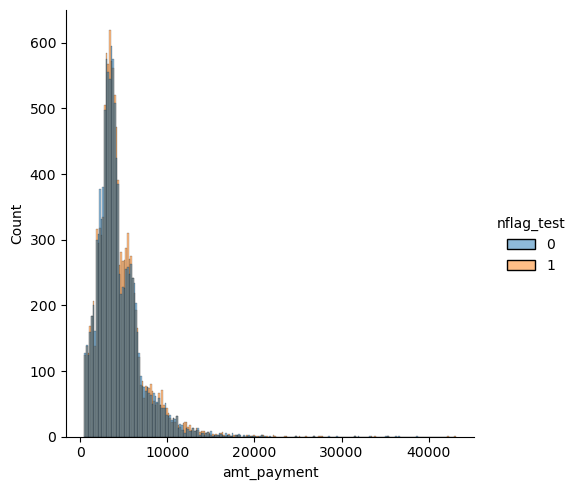

In [56]:
sns.displot(new_df[new_df['amt_payment'] > 0], x = 'amt_payment', hue = 'nflag_test')
plt.show()

In [58]:
from scipy.stats import ttest_ind

In [63]:
test_calc(new_df[new_df['nflag_test']==1]['amt_payment'], new_df[new_df['nflag_test']==0]['amt_payment'])

Нулевая гипотеза не подтверждается. Средние не равны
Разница = 158.91123610796285


(5.663915722973564, 1.488511135509387e-08)

In [64]:
test_calc(new_df[new_df['nflag_test']==1]['flag_pay'], new_df[new_df['nflag_test']==0]['flag_pay'])

Нулевая гипотеза не подтверждается. Средние не равны
Разница = 0.02520549875986211


(5.377160738040539, 7.604318948190198e-08)

In [68]:
from scipy.stats import mannwhitneyu

In [71]:
mann_whitney_func(new_df[new_df['nflag_test']==1]['amt_payment'], new_df[new_df['nflag_test']==0]['amt_payment'])

Распределения не равны


(264700600.0, 1.246458969497137e-09)

Санкт-Петербург



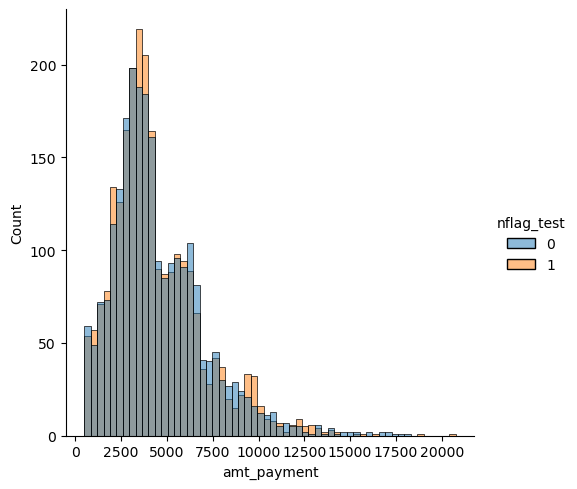

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 453.0


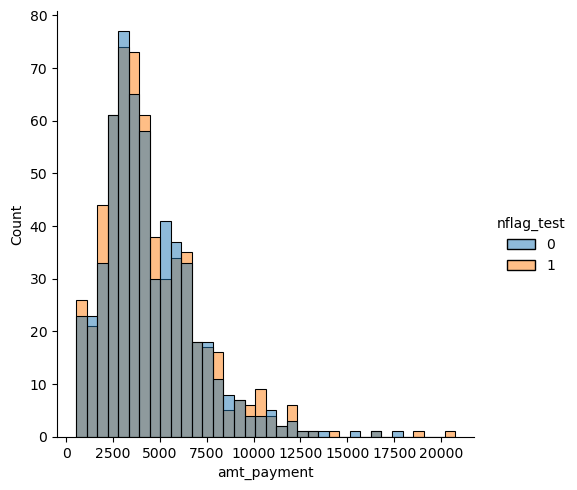

Номер ТТ = 112.0


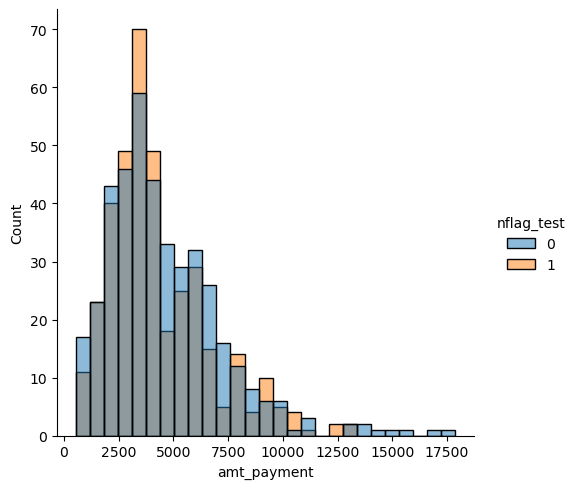

Номер ТТ = 117.0


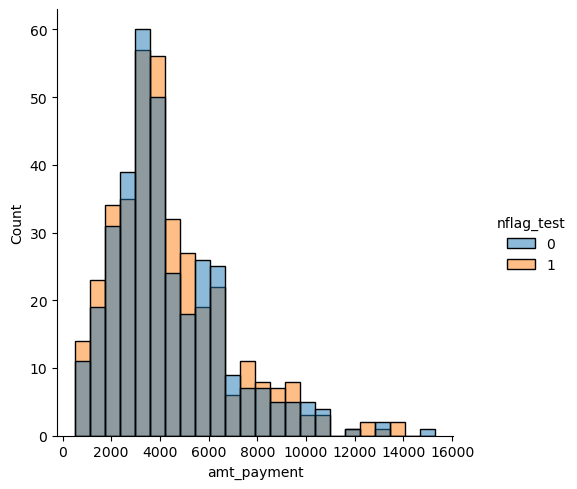

Номер ТТ = 309.0


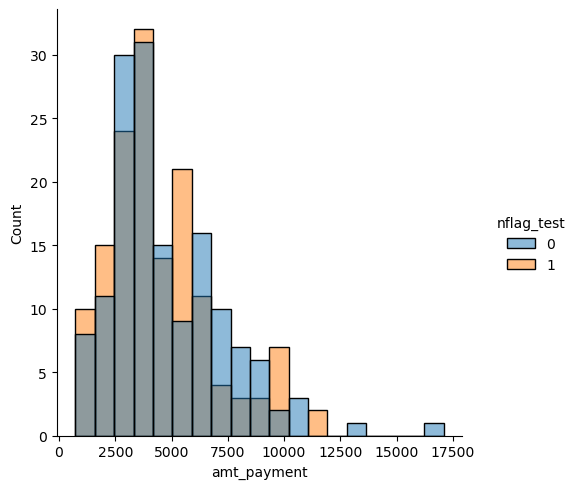

Номер ТТ = 576.0


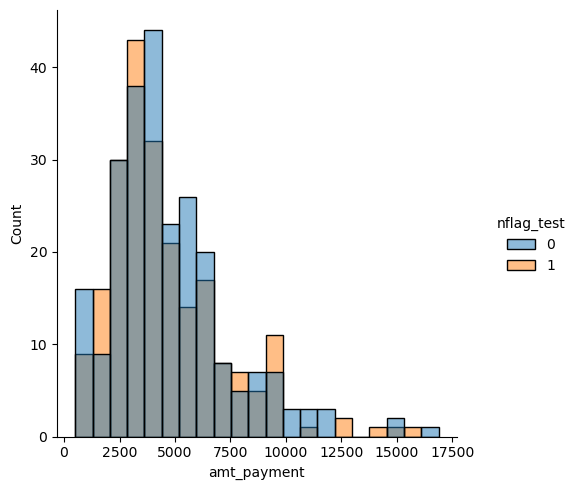

Номер ТТ = 900.0


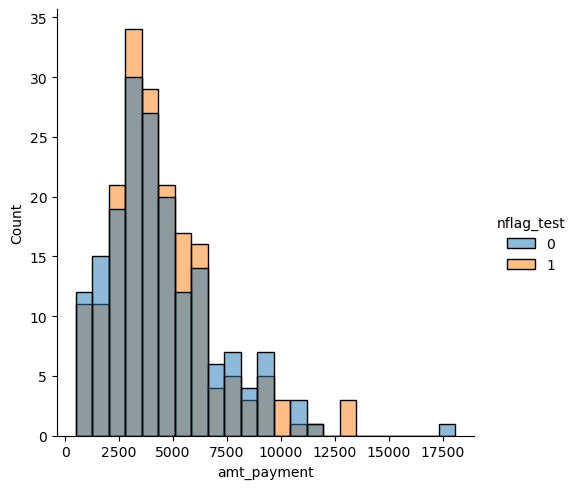

Номер ТТ = 213.0


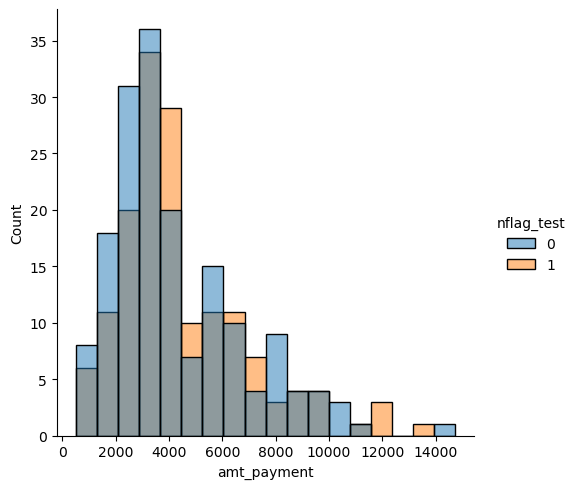

Номер ТТ = 801.0


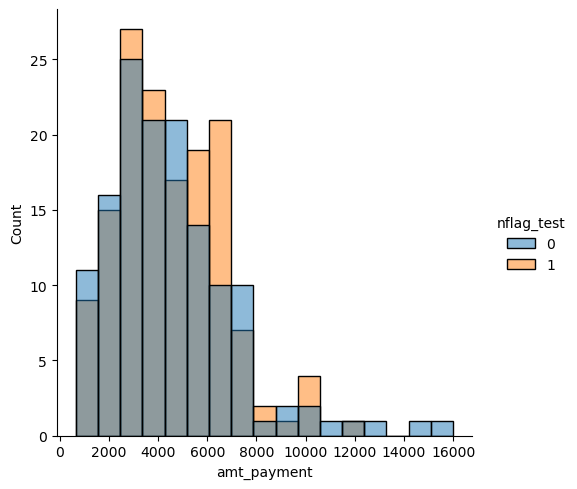

Номер ТТ = 573.0


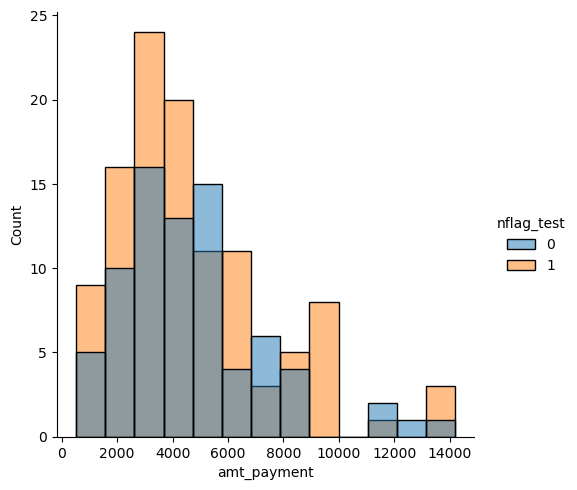

Номер ТТ = 891.0


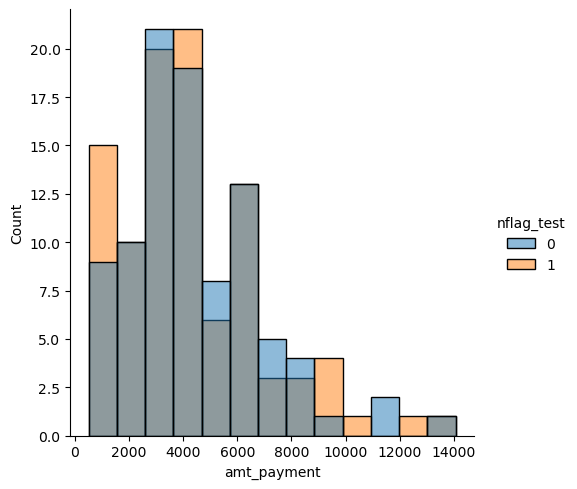

Номер ТТ = 394.0


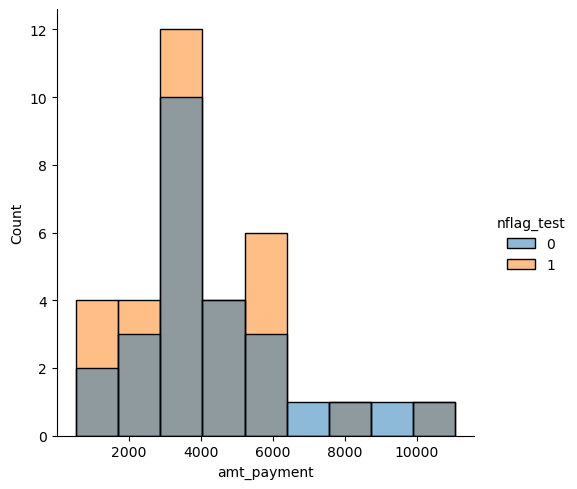

Москва



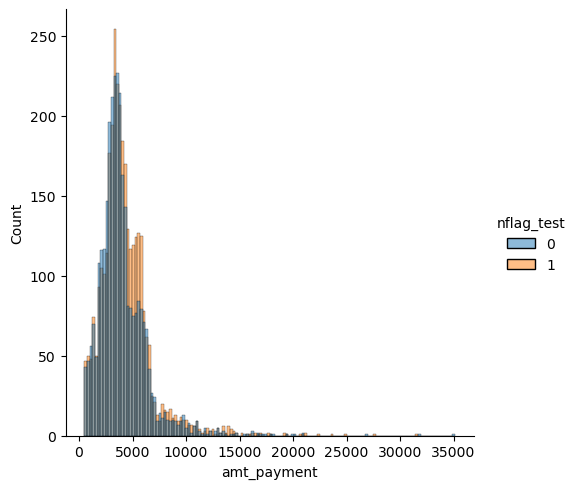

Нулевая гипотеза не подтверждается. Средние не равны
Разница = -381.7784892750842
Нулевая гипотеза не подтверждается. Средние не равны
Разница = -0.05557800593933432
Номер ТТ = 2652.0


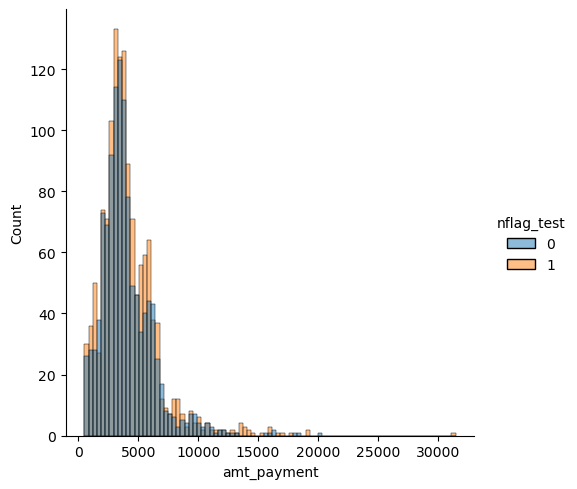

Номер ТТ = 3786.0


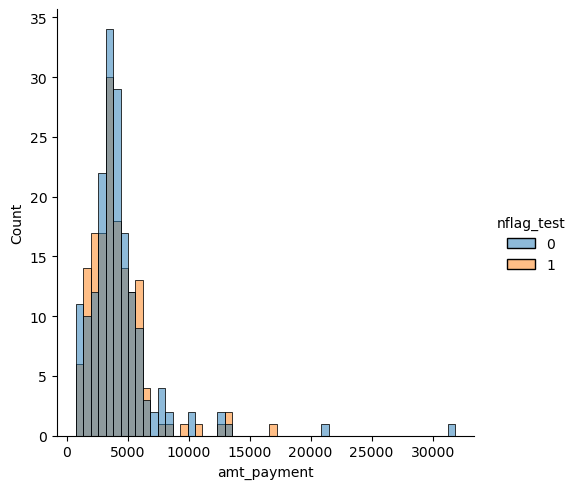

Номер ТТ = 1287.0


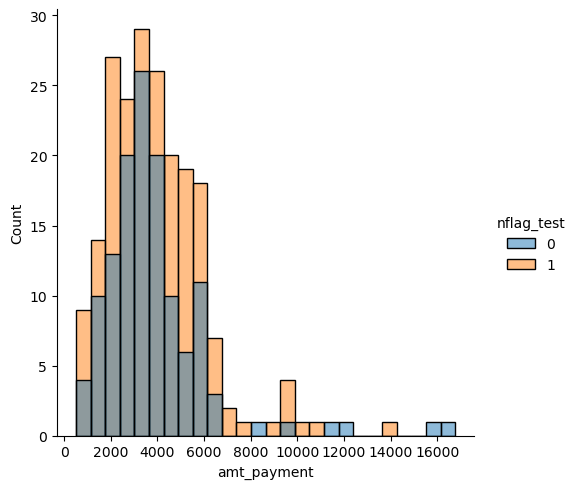

Номер ТТ = 1654.0


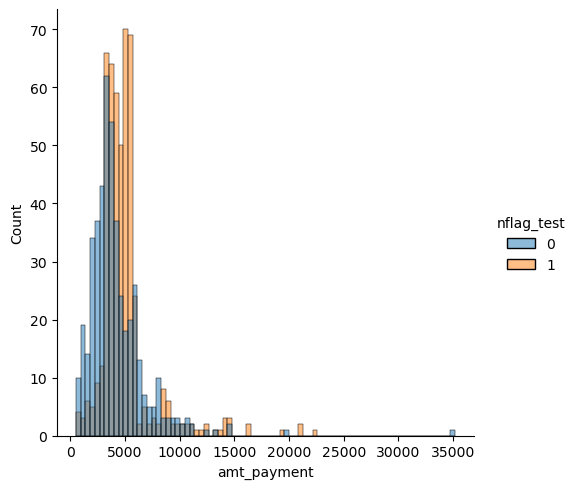

Номер ТТ = 3987.0


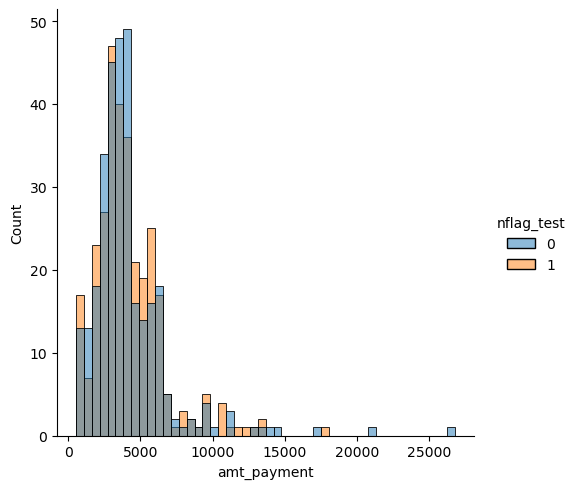

Номер ТТ = 2212.0


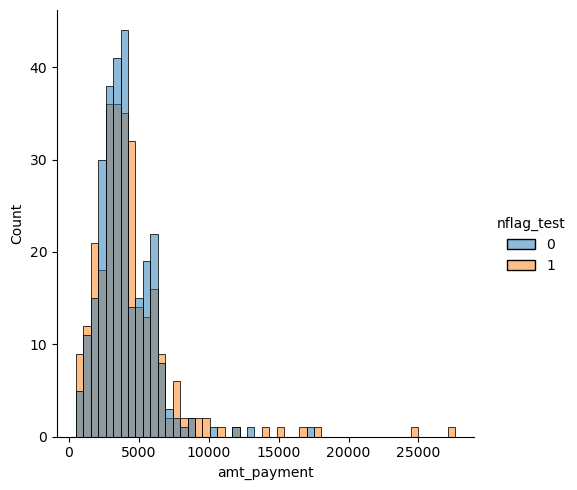

Номер ТТ = 8543.0


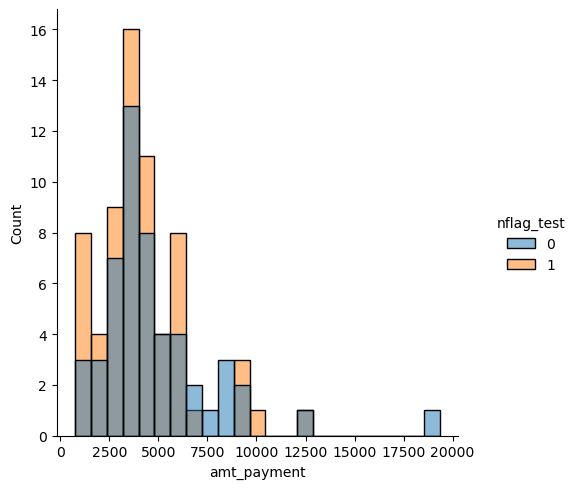

Номер ТТ = 6543.0


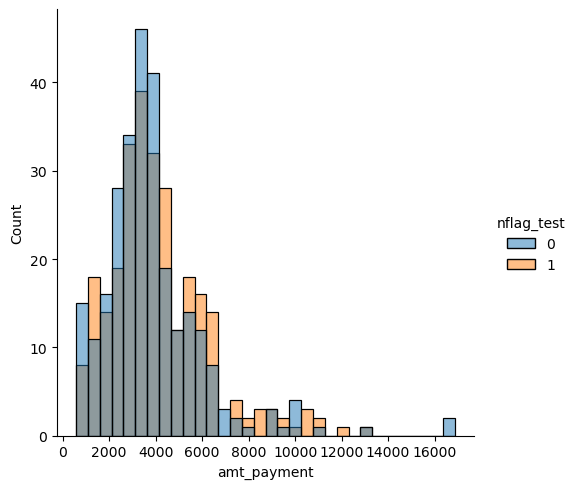

Номер ТТ = 9121.0


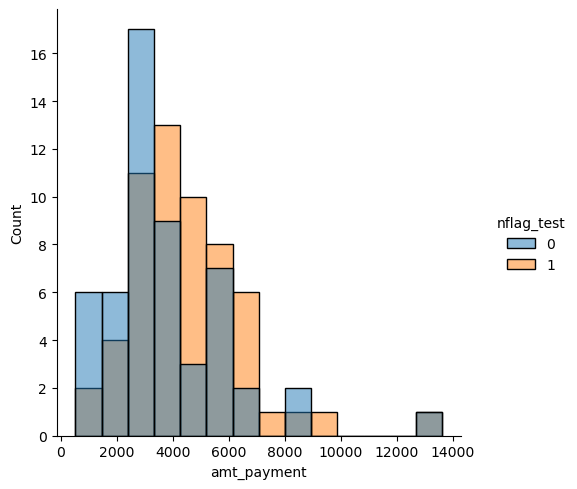

Номер ТТ = 1002.0


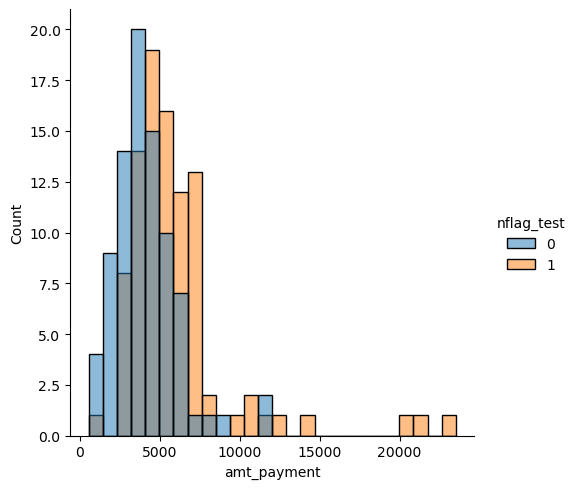

Номер ТТ = 9931.0


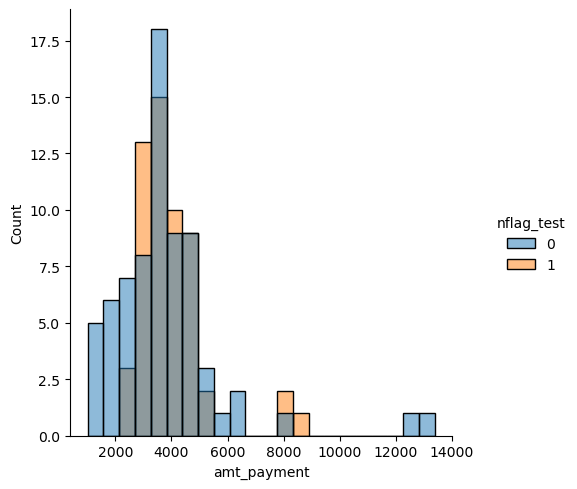

Саратов



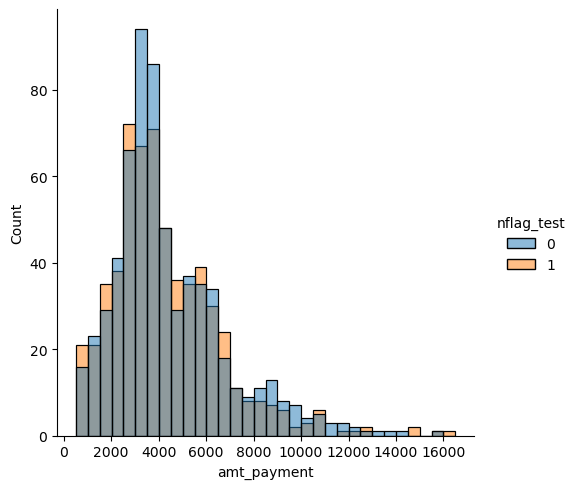

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 80.0


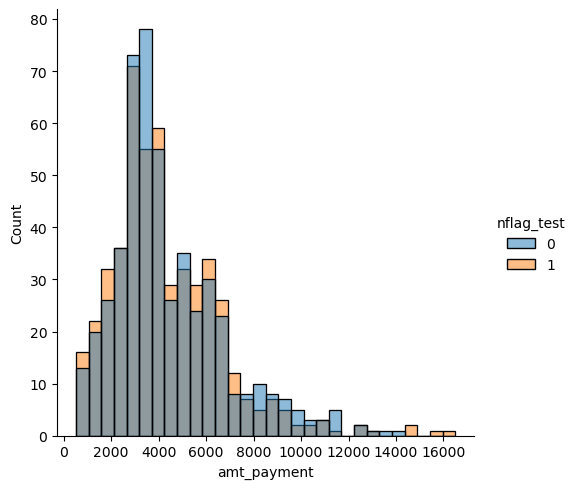

Номер ТТ = 82.0


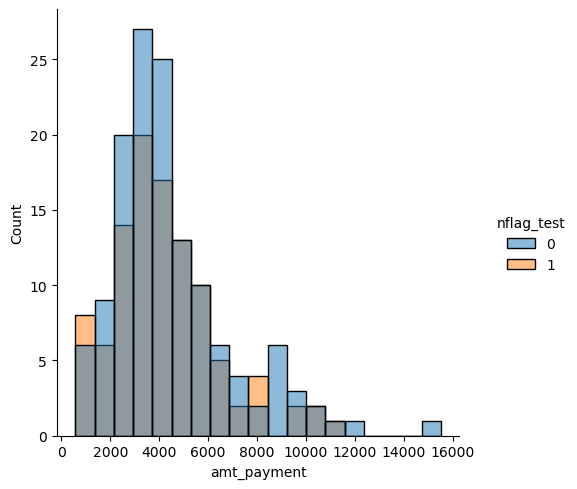

Тольятти



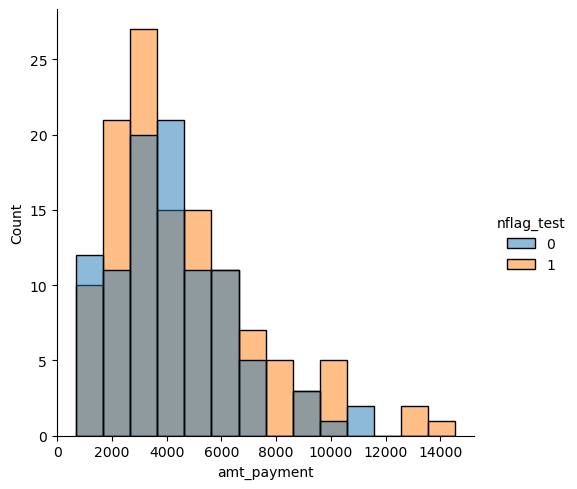

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 88.0


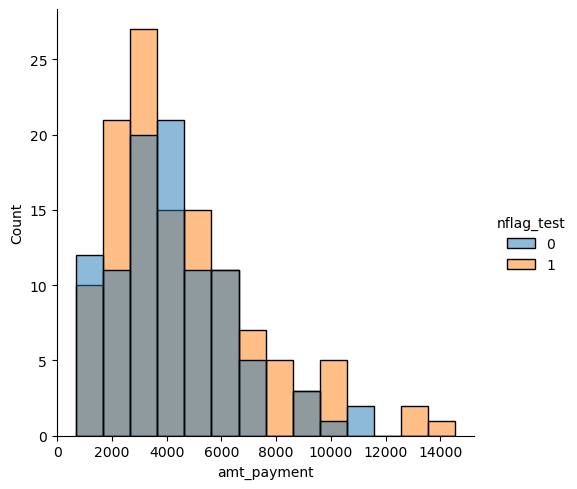

Владимир



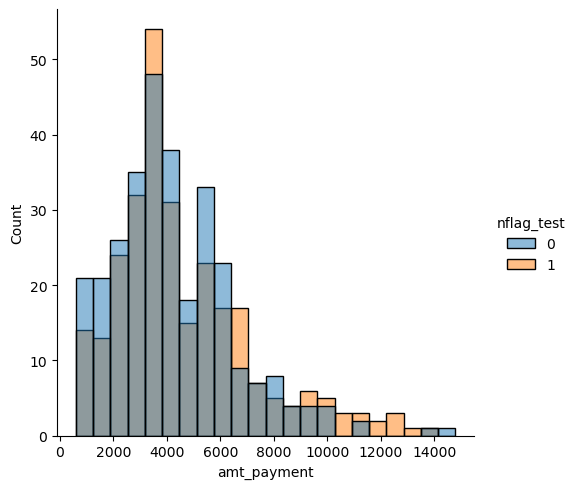

Нулевая гипотеза не подтверждается. Средние не равны
Разница = -438.6098419243094
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 11.0


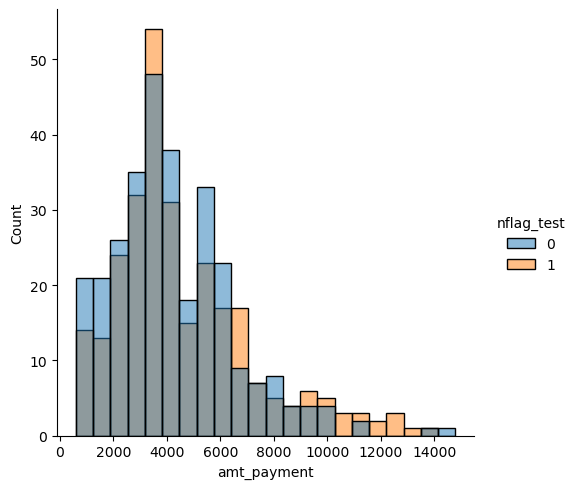

Мурманск



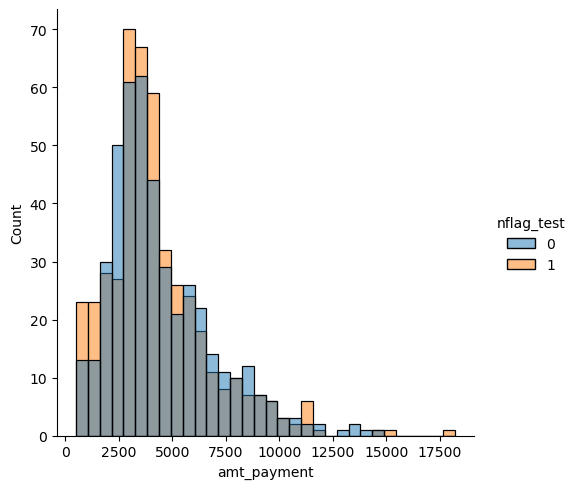

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 55.0


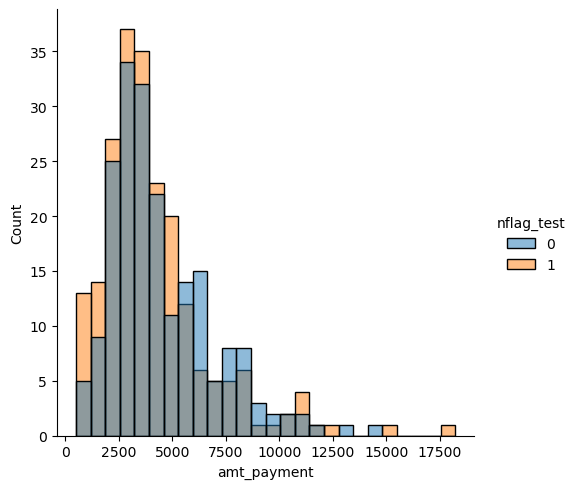

Номер ТТ = 54.0


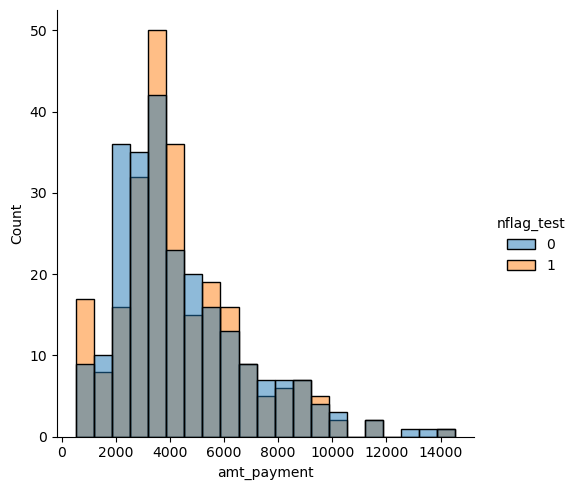

Красноярск



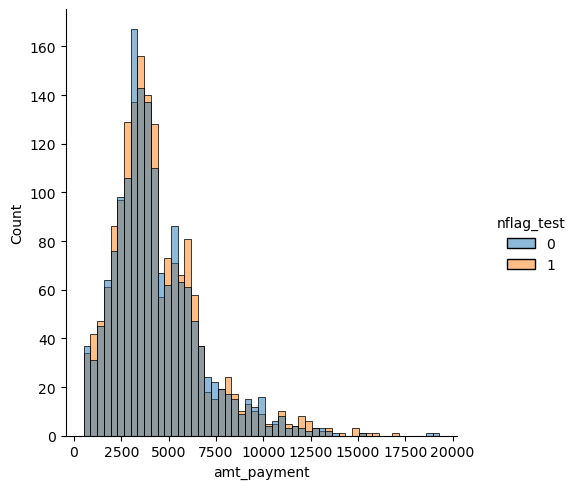

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 212.0


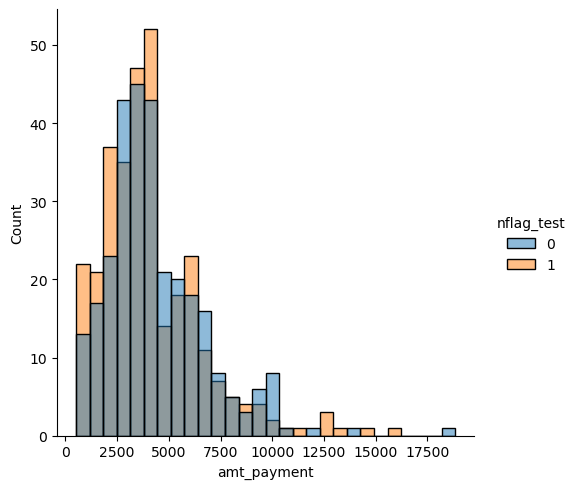

Номер ТТ = 277.0


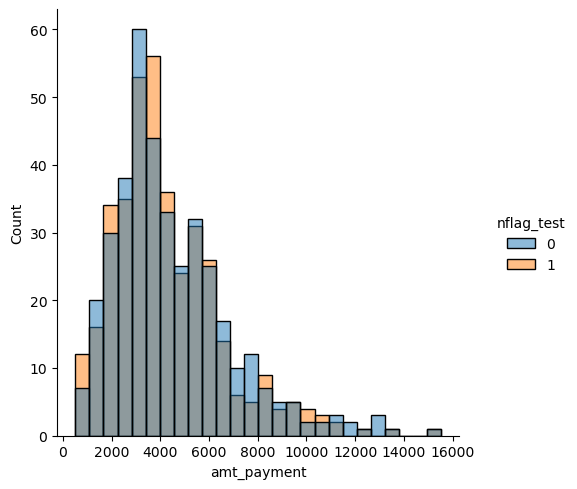

Номер ТТ = 202.0


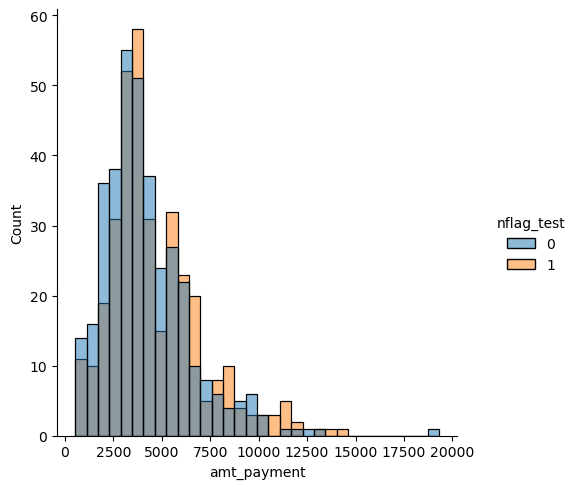

Номер ТТ = 444.0


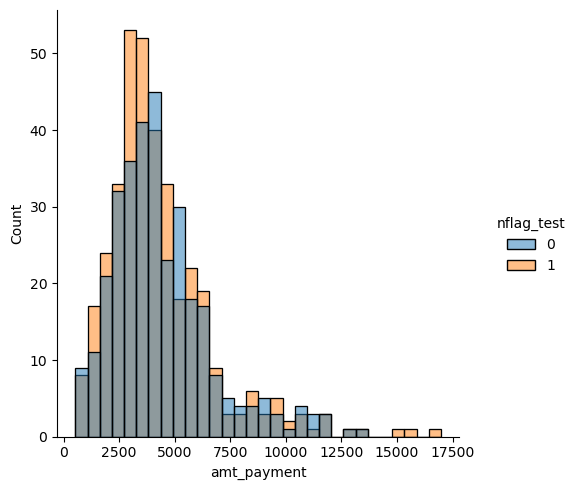

Номер ТТ = 278.0


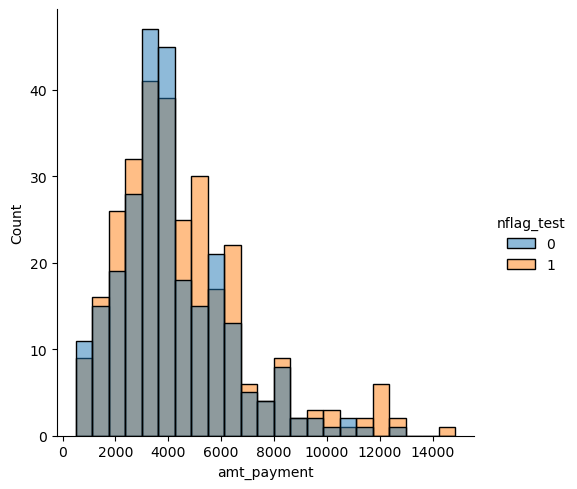

Казань



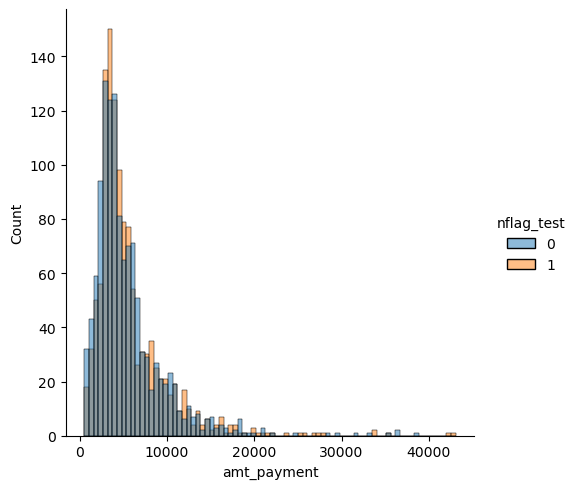

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 477.0


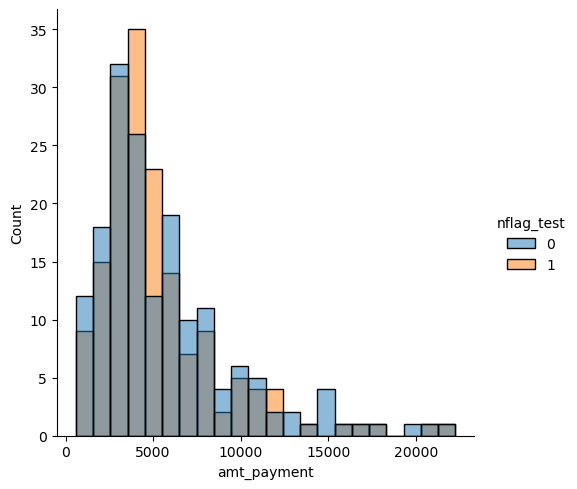

Номер ТТ = 439.0


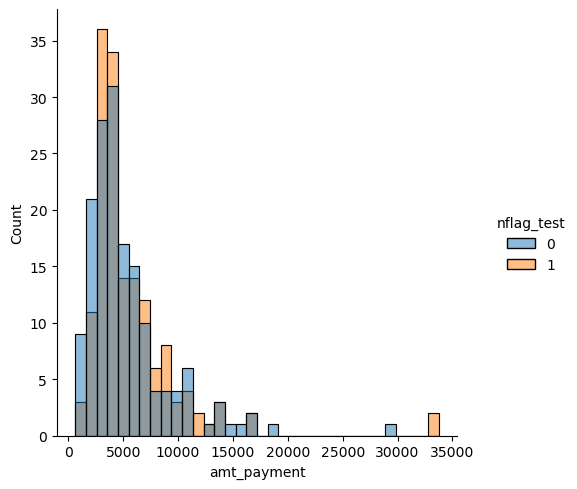

Номер ТТ = 544.0


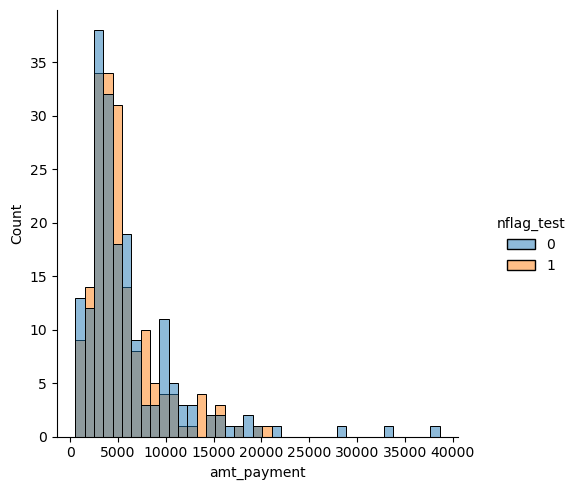

Номер ТТ = 699.0


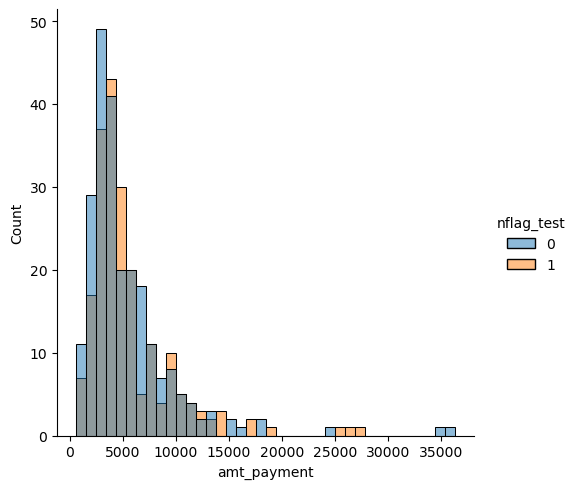

Номер ТТ = 991.0


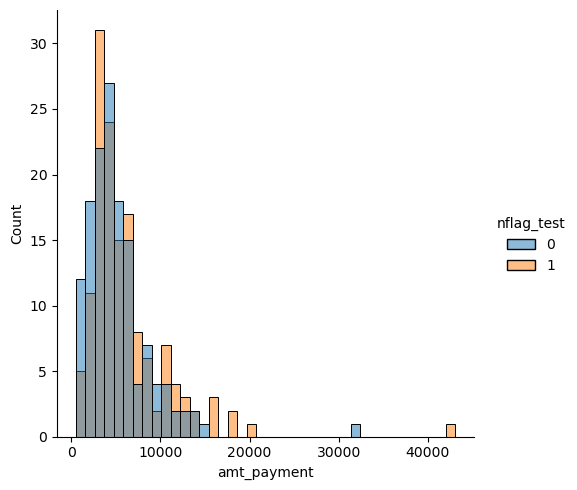

Номер ТТ = 516.0


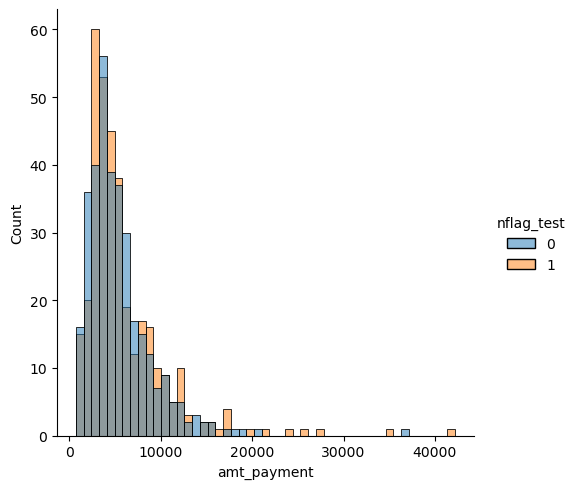

Самара



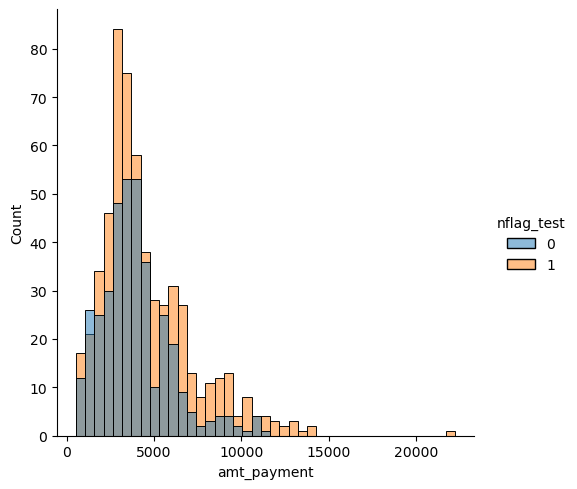

Нулевая гипотеза не подтверждается. Средние не равны
Разница = -1544.3720191247648
Нулевая гипотеза не подтверждается. Средние не равны
Разница = -0.2772412939282998
Номер ТТ = 33.0


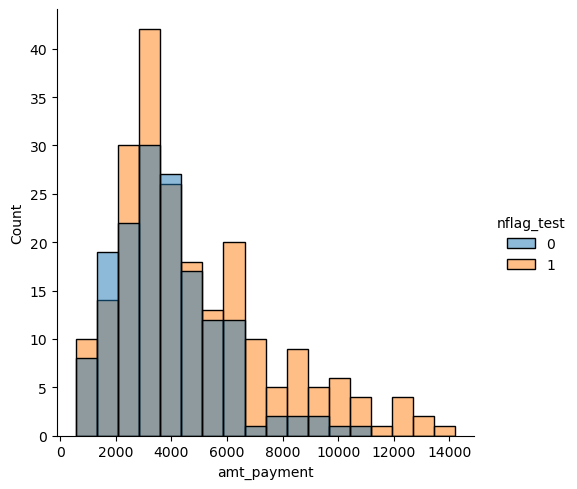

Номер ТТ = 34.0


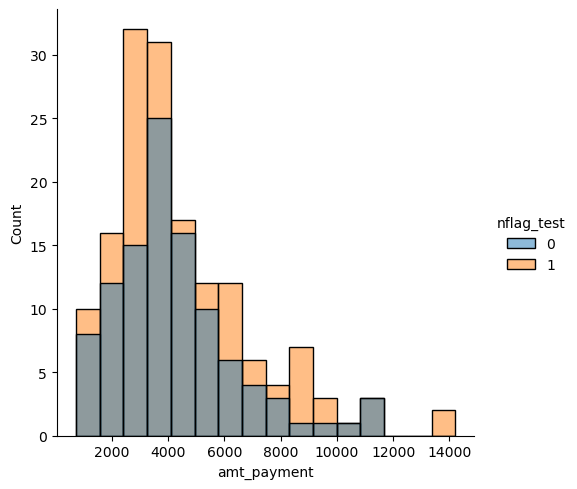

Номер ТТ = 35.0


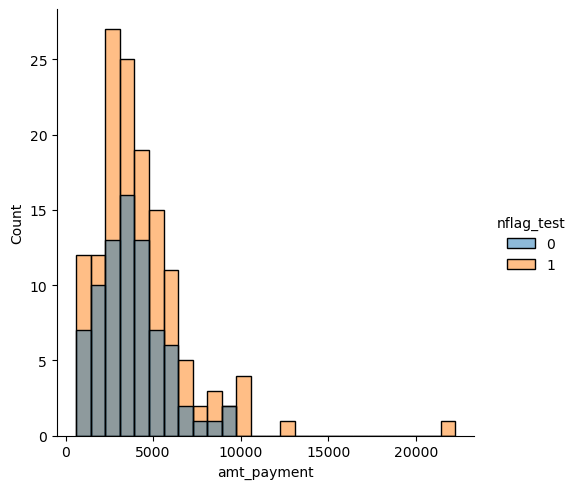

Номер ТТ = 36.0


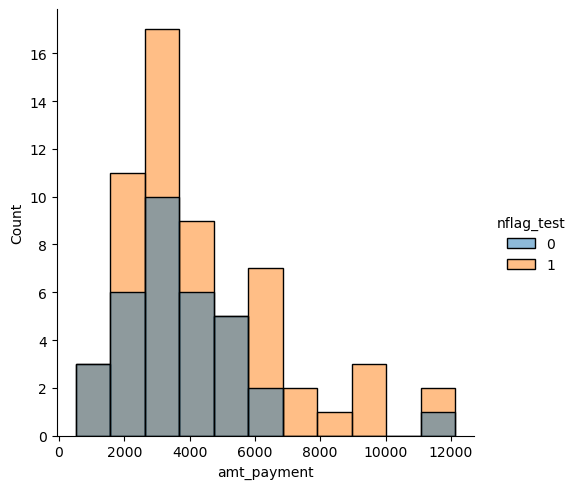

Волгоград



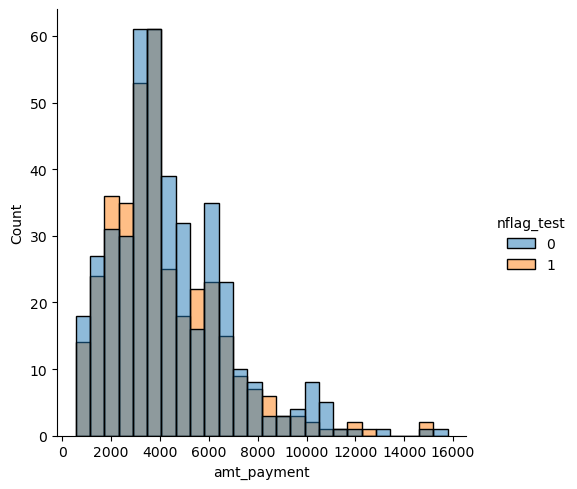

Нулевая гипотеза не подтверждается. Средние не равны
Разница = 312.89040013337035
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 66.0


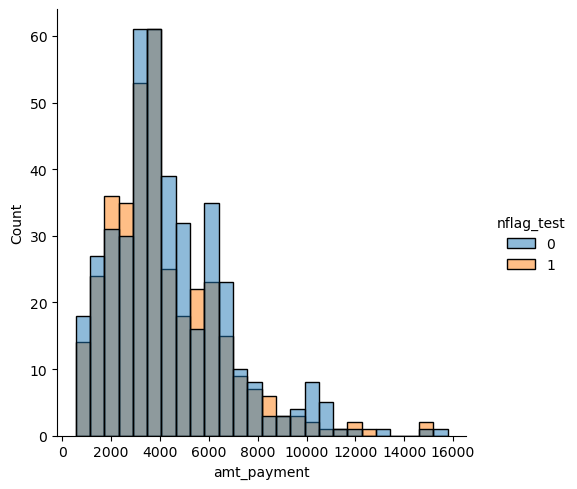

Сочи



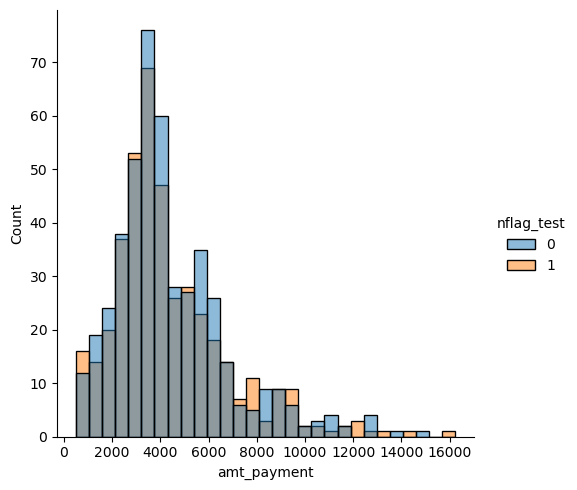

Не можем отвергнуть нулевую гипотезу. Средние равны
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 0.04931605920420967
Номер ТТ = 72.0


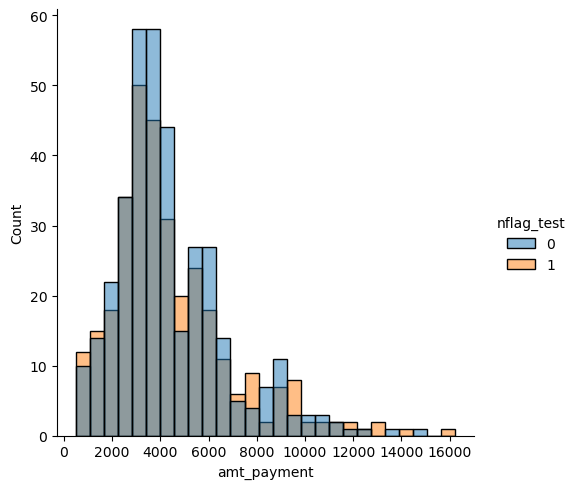

Номер ТТ = 73.0


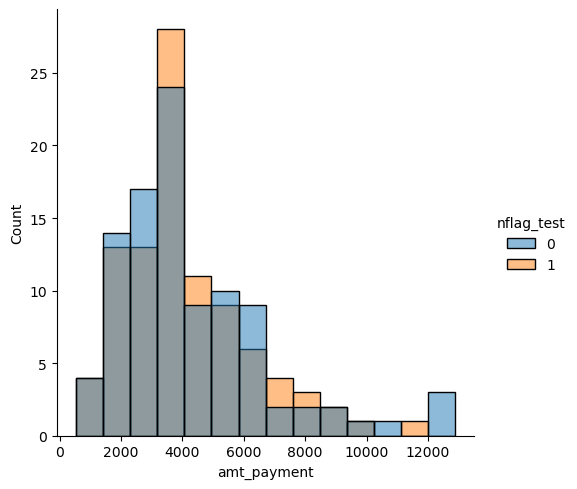

Краснодар



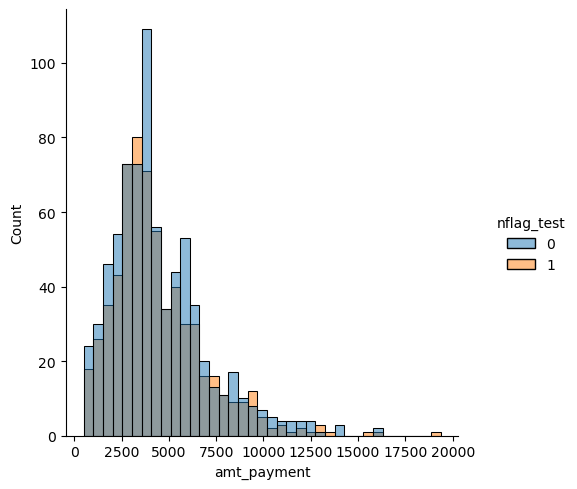

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 1101.0


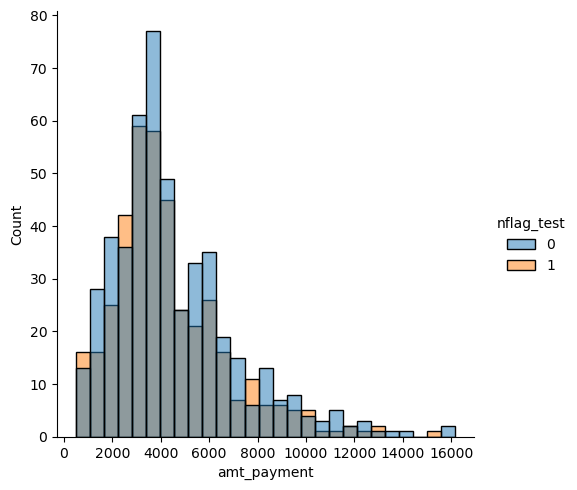

Номер ТТ = 1989.0


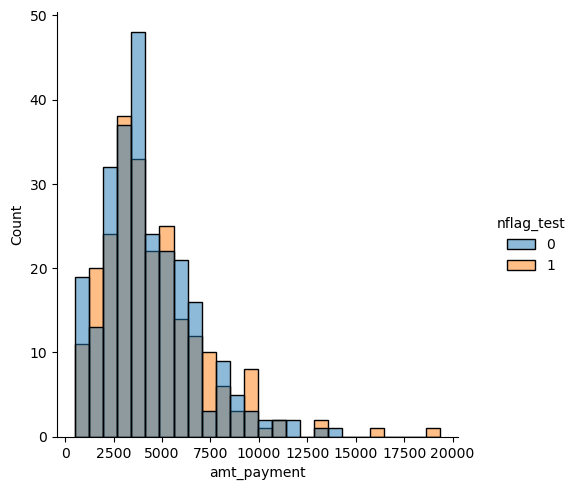

Дмитров



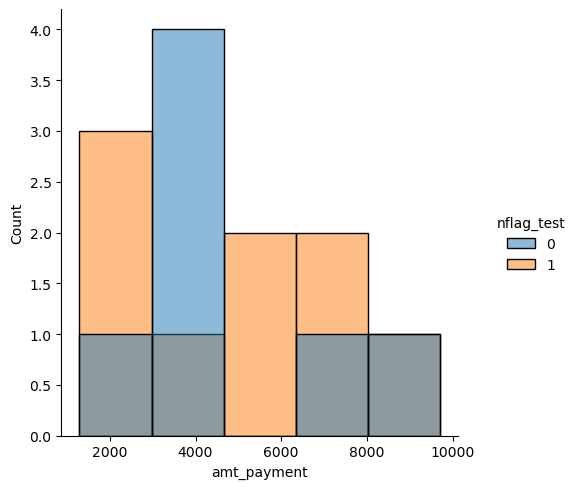

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 2.0


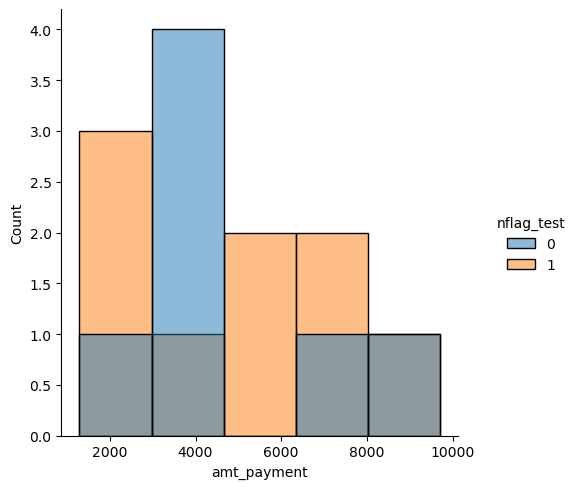

Тюмень



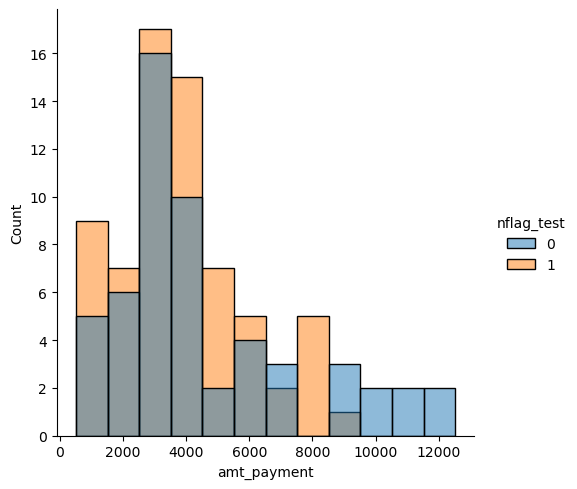

Не можем отвергнуть нулевую гипотезу. Средние равны
Нулевая гипотеза не подтверждается. Средние не равны
Разница = -0.1463645943097998
Номер ТТ = 19.0


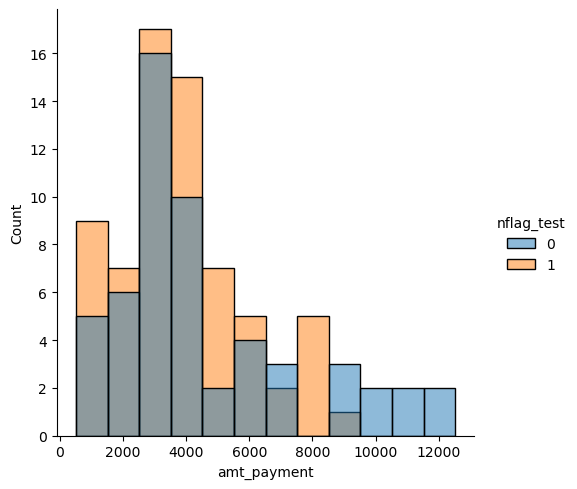

Сахалинск



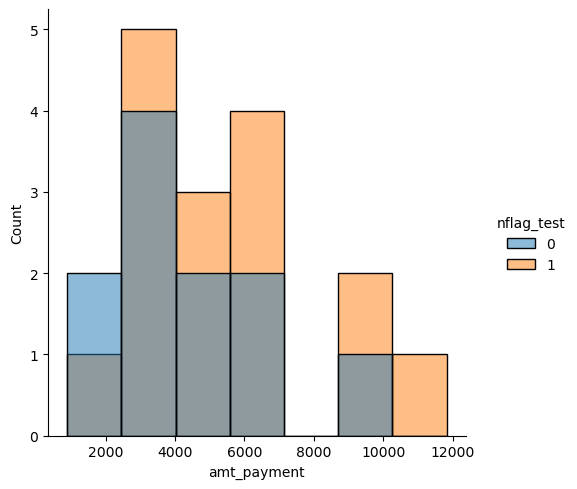

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Номер ТТ = 69.0


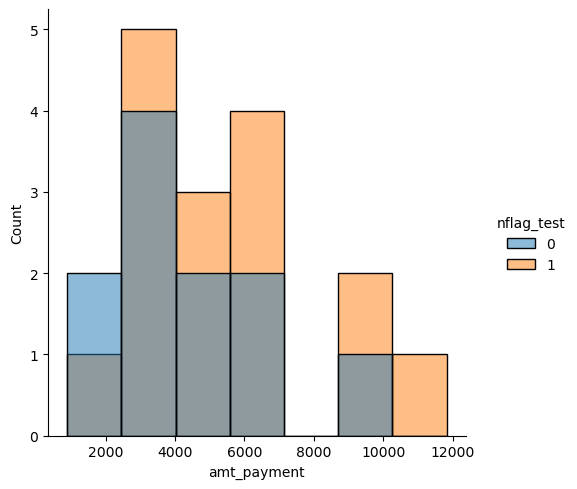

In [77]:
cities = list(new_df['city'].unique())
for i in cities:
    print(i)
    print()
    df_cities = new_df[new_df['city']==i]
    sns.displot(df_cities[df_cities['amt_payment']>0] , x = 'amt_payment', hue = 'nflag_test')
    plt.show()
    test_calc(df_cities[df_cities['nflag_test']==0]['amt_payment'], df_cities[df_cities['nflag_test']==1]['amt_payment'])
    test_calc(df_cities[df_cities['nflag_test']==0]['flag_pay'], df_cities[df_cities['nflag_test']==1]['flag_pay'])
    
    for j in df_cities['id_trading_point'].unique():
        bbb = df_cities[df_cities['id_trading_point']==j]
        print('Номер ТТ =', j)
        sns.displot(bbb[bbb['amt_payment'] > 0] , x = 'amt_payment', hue = 'nflag_test')
        plt.show()

In [119]:
df_final = pd.DataFrame()
for i in new_df['city'].unique():
    bbb = new_df[new_df['city']==i]
    for j in bbb['id_trading_point'].unique():
        bbb_1 = bbb[bbb['id_trading_point']==j]
        count_test = len(bbb_1[bbb_1['nflag_test']==1])
        count_control = len(bbb_1[bbb_1['nflag_test']==0])
        count_all = count_test + count_control
        sigma_test = bbb_1[bbb_1['nflag_test']==1]['amt_payment'].std()
        sigma_control = bbb_1[bbb_1['nflag_test']==0]['amt_payment'].std()
        avg_test = np.mean(bbb_1[bbb_1['nflag_test']==1]['amt_payment'])
        avg_control = np.mean(bbb_1[bbb_1['nflag_test']==0]['amt_payment'])
        diff = avg_test - avg_control
        sa, pa = test_calc(bbb_1[bbb_1['nflag_test']==1]['amt_payment'], bbb_1[bbb_1['nflag_test']==0]['amt_payment'])
        sp, pp = test_calc(bbb_1[bbb_1['nflag_test']==1]['flag_pay'], bbb_1[bbb_1['nflag_test']==0]['flag_pay'])
        
        df_final = df_final.append({'city' :i, 'id_trading_point' :j
                        ,'count_test' :count_test
                        ,'count_control' :count_control
                        ,'count_all' :count_all
                        ,'avg_test' :avg_test
                        ,'avg_control' :avg_control
                        ,'sigma_test' :sigma_test
                        ,'sigma_control' :sigma_control
                        ,'diff' :diff
                        ,'ab_test_s' :sa
                        ,'ab_test_p' :pa
                        ,'p_test_s' :sp}, ignore_index=True)

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 676.6951977401131
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 0.1458686440677966
Не мо

C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarni

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 2276.966389145853
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 0.23435090965155725
Нулевая гипотеза не подтверждается. Средние не равны
Разница = -552.909116931444
Нулевая гипотеза не подтверждается. Средние не равны
Разница = -0.15877105099947525
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Нулевая гипотеза не подтверждается. Средние не 

C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarni

Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 796.2950869236583
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Не можем отвергнуть нулевую гипотезу. Средние равны
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 2286.832230686982
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 0.3436246992782679
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 1351.8979710144927
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 0.27831357048748356
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 1253.3892475190287
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 0.24747085461027074
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 1126.909804558497
Нулевая гипотеза не подтверждается. Средние не равны
Разница = 0.22397271398408314
Ну

C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'city' :i, 'id_trading_point' :j
C:\Temp\ipykernel_3180\1211221311.py:17: FutureWarni

In [122]:
df_final

,city,id_trading_point,count_test,count_control,count_all,avg_test,avg_control,sigma_test,sigma_control,diff,ab_test_s,ab_test_p,p_test_s,percent_count,flag_diff
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,2420.415634,2993.442540,2890.088044,81.550595,0.637238,5.240386e-01,0.728421,0.046670,No diff
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2776.241581,2778.179183,3057.040898,-288.126551,-1.799588,7.215174e-02,-1.039726,0.029458,No diff
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2592.086882,2835.004503,2813.867330,-9.789282,-0.060294,9.519316e-01,-0.033579,0.026744,No diff
3,Санкт-Петербург,309.0,240,238,478,2706.279167,3003.789916,2814.939849,3077.161555,-297.510749,-1.103047,2.705641e-01,-0.492541,0.010548,No diff
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1760.296804,2683.727211,2815.093171,-165.860296,-1.080998,2.799008e-01,-0.944088,0.028399,No diff
5,Санкт-Петербург,900.0,335,341,676,2450.991045,2299.768328,2865.607356,2878.774167,151.222716,0.684416,4.939479e-01,0.787685,0.014917,No diff
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2857.058824,2905.494362,2845.245598,120.570487,0.462369,6.440239e-01,-0.058097,0.010746,No diff
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2980.155660,2774.292063,3049.074475,-55.013438,-0.197457,8.435623e-01,-0.044896,0.009643,No diff
8,Санкт-Петербург,573.0,177,160,337,2929.045198,2252.350000,3201.098137,2975.544726,676.695198,2.003598,4.591805e-02,2.713820,0.007436,Positive
9,Санкт-Петербург,891.0,159,167,326,2618.949686,2495.455090,2899.782464,2893.862408,123.494596,0.384755,7.006710e-01,1.088194,0.007194,No diff


In [121]:
df_final['percent_count'] = (df_final['count_all'] / df_final['count_all'].sum())
df_final['flag_diff'] = np.where((df_final['ab_test_p'] < 0.05) & (df_final['diff'] > 0), 'Positive'
    , np.where((df_final['ab_test_p'] < 0.05) & (df_final['diff'] < 0), 'Negative', 'No diff'))

In [113]:
writer = pd.ExcelWriter('Результаты.xlsx', engine = 'xlsxwriter')
df_final[df_final['flag_diff']=='Positive'].to_excel(writer, sheet_name = 'Успех', index = False)
df_final[df_final['flag_diff']=='Negative'].to_excel(writer, sheet_name = 'Не успех', index = False)
df_final[df_final['flag_diff']=='No diff'].to_excel(writer, sheet_name = 'Нет разницы', index = False)
writer.close()